# Estatística no MF

## 1 - Estudo de caso MGLU3

In [85]:
import yfinance as yf

In [86]:
mglu3_close = yf.download('MGLU3.SA', period= 'max')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [87]:
mglu3_close

Date
2011-05-02    0.463173
2011-05-03    0.458950
2011-05-04    0.464018
2011-05-05    0.461202
2011-05-06    0.457824
                ...   
2023-11-06    1.430000
2023-11-07    1.770000
2023-11-08    1.780000
2023-11-09    1.710000
2023-11-10    1.800000
Name: Adj Close, Length: 3114, dtype: float64

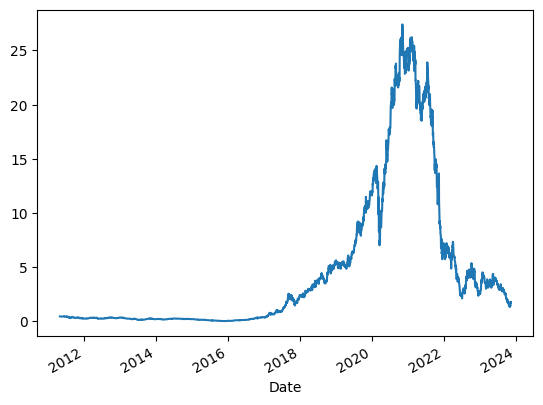

In [88]:
mglu3_close.plot();

In [12]:
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import sweetviz as sv
import numpy as np

In [90]:
fig01 = make_subplots(rows = 1, cols = 2)

fig01.add_trace(go.Histogram(x=mglu3_close),row=1,col=1)
fig01.add_vline(x=np.mean(mglu3_close), line_width=3,  line_color="red", row=1,col=1)
fig01.add_vline(x=np.median(mglu3_close), line_width=3, line_dash="dash", line_color="red",row=1,col=1)


fig01.add_trace(go.Box(y=mglu3_close, boxpoints='all', boxmean='sd'),row=1,col=2)

fig01.update_layout(width=800, height=400, template = 'simple_white', 
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=True)

In [91]:
mglu3_close.describe()

count    3114.000000
mean        4.570179
std         6.745409
min         0.029192
25%         0.251115
50%         1.420000
75%         5.304279
max        27.401571
Name: Adj Close, dtype: float64

* Variação percentual

In [96]:
mglu_var = mglu3_close.pct_change()

In [98]:
mglu_var = mglu_var.dropna()

In [102]:
fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(go.Histogram(x=mglu_var),row=1,col=1)
fig.add_vline(x=np.mean(mglu_var), line_width=3,  line_color="red", row=1,col=1)
fig.add_vline(x=np.median(mglu_var), line_width=3, line_dash="dash", line_color="red",row=1,col=1)


fig.add_trace(go.Box(y=mglu_var, boxpoints='all', boxmean='sd'),row=1,col=2)

fig.update_layout(width=800, height=400, template = 'simple_white', 
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=True)

## 2 - Estudo IBOV

In [9]:
ibov = yf.download('^BVSP', start= '2000-01-01')['Close']

[*********************100%%**********************]  1 of 1 completed


In [10]:
ibov

Date
2000-01-03     16930.000000
2000-01-04     15851.000000
2000-01-05     16245.000000
2000-01-06     16107.000000
2000-01-07     16309.000000
                  ...      
2023-11-06    118487.000000
2023-11-07    119268.000000
2023-11-08    119099.000000
2023-11-09    119012.000000
2023-11-10    120568.140625
Name: Close, Length: 5908, dtype: float64

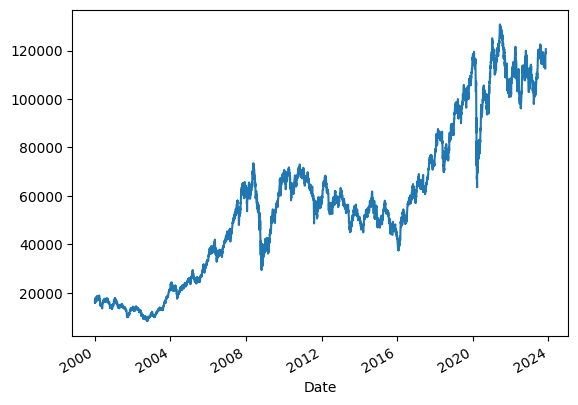

In [11]:
ibov.plot();

In [12]:
#Criando o histograma
fig02 = px.histogram(ibov)

# Adicionado as linhas de média e mediana
fig02.add_vline(x=np.mean(ibov), line_width=3,  line_color="red")
fig02.add_vline(x=np.median(ibov), line_width=3, line_dash="dash", line_color="red")

# Exibindo a figura
fig02

In [13]:
from scipy import stats
import pylab

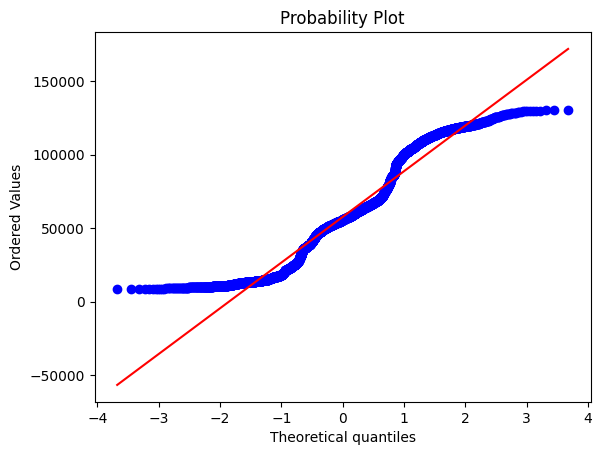

In [14]:
stats.probplot(ibov, dist="norm", plot=pylab)
pylab.show()

* Fazendo os retornos de IBOV

In [15]:
retornos_ibov = ibov.pct_change()

In [16]:
retornos_ibov.dropna(inplace= True)
retornos_ibov

Date
2000-01-04   -0.063733
2000-01-05    0.024856
2000-01-06   -0.008495
2000-01-07    0.012541
2000-01-10    0.043718
                ...   
2023-11-06    0.002767
2023-11-07    0.006591
2023-11-08   -0.001417
2023-11-09   -0.000730
2023-11-10    0.013075
Name: Close, Length: 5907, dtype: float64

In [17]:
#Criando o histograma
fig03 = px.histogram(retornos_ibov)

# Adicionado as linhas de média e mediana
fig03.add_vline(x=np.mean(retornos_ibov), line_width=3,  line_color="red")
fig03.add_vline(x=np.median(retornos_ibov), line_width=3, line_dash="dash", line_color="red")

# Exibindo a figura
fig03

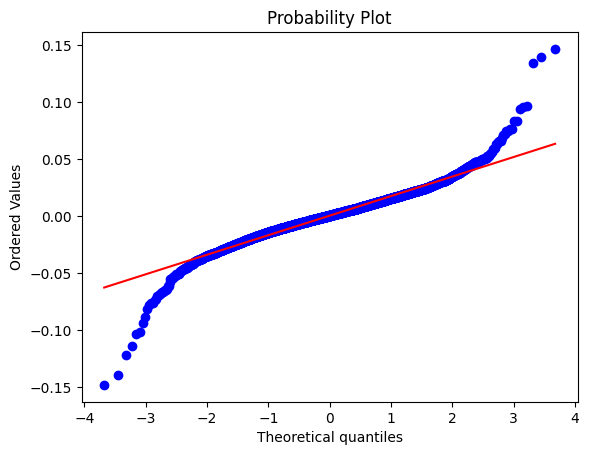

In [18]:
stats.probplot(retornos_ibov, dist="norm", plot=pylab)
pylab.show()

* Analisando Skewness e Curtose

In [19]:
stats.skew(retornos_ibov)

-0.12163745629942234

In [20]:
stats.kurtosis(retornos_ibov, fisher= True)

6.266615744901422

## 3 - Dividendos PETR4

In [21]:
import pandas as pd

In [22]:
dividendos_petr4 = pd.read_csv('dividendos_petr4.csv', index_col= 0)

In [23]:
dividendos_petr4

,Close,Dividends
Date,,
2000-01-03 02:00:00+00:00,1.872027,0.0
2000-01-04 02:00:00+00:00,1.768468,0.0
2000-01-05 02:00:00+00:00,1.750624,0.0
2000-01-06 02:00:00+00:00,1.744569,0.0
2000-01-07 02:00:00+00:00,1.752537,0.0
...,...,...
2023-01-27 03:00:00+00:00,25.620001,0.0
2023-01-30 03:00:00+00:00,25.750000,0.0
2023-01-31 03:00:00+00:00,26.070000,0.0


In [24]:
dividendos_petr4.index = pd.to_datetime(dividendos_petr4.index)

In [25]:
dividendos_petr4.index

DatetimeIndex(['2000-01-03 02:00:00+00:00', '2000-01-04 02:00:00+00:00',
               '2000-01-05 02:00:00+00:00', '2000-01-06 02:00:00+00:00',
               '2000-01-07 02:00:00+00:00', '2000-01-10 02:00:00+00:00',
               '2000-01-11 02:00:00+00:00', '2000-01-12 02:00:00+00:00',
               '2000-01-13 02:00:00+00:00', '2000-01-14 02:00:00+00:00',
               ...
               '2023-01-20 03:00:00+00:00', '2023-01-23 03:00:00+00:00',
               '2023-01-24 03:00:00+00:00', '2023-01-25 03:00:00+00:00',
               '2023-01-26 03:00:00+00:00', '2023-01-27 03:00:00+00:00',
               '2023-01-30 03:00:00+00:00', '2023-01-31 03:00:00+00:00',
               '2023-02-01 03:00:00+00:00', '2023-02-02 03:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=5802, freq=None)

In [26]:
dividendos_petr4['soma_dividendos'] = dividendos_petr4.Dividends.rolling('365D').sum()

In [27]:
dividendos_petr4.tail()

,Close,Dividends,soma_dividendos
Date,,,
2023-01-27 03:00:00+00:00,25.620001,0.0,16.766642
2023-01-30 03:00:00+00:00,25.750000,0.0,16.766642
2023-01-31 03:00:00+00:00,26.070000,0.0,16.766642
2023-02-01 03:00:00+00:00,25.709999,0.0,16.766642
2023-02-02 03:00:00+00:00,24.520000,0.0,16.766642


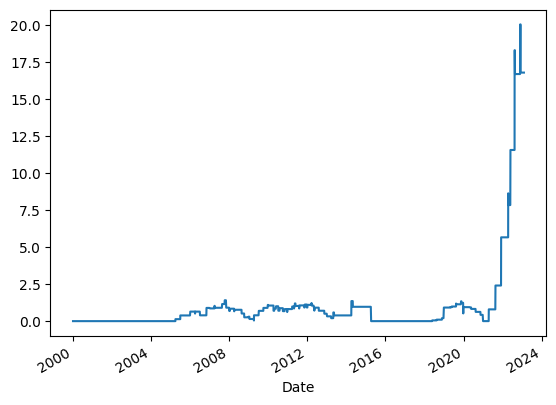

In [28]:
dividendos_petr4.soma_dividendos.plot();

In [29]:
dividendos_petr4['DY'] = dividendos_petr4['soma_dividendos']/dividendos_petr4.Close * 100

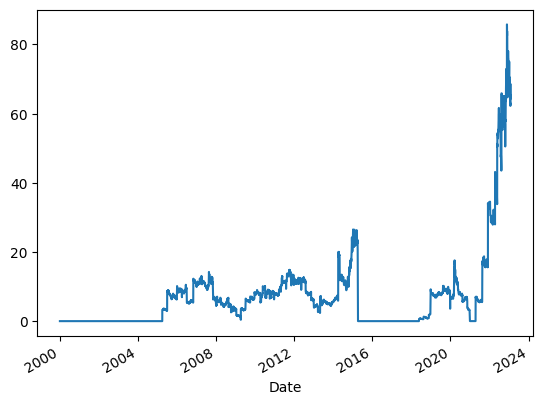

In [30]:
dividendos_petr4['DY'].plot();

In [31]:
dy_petr4 = dividendos_petr4[dividendos_petr4['Dividends']!=0]

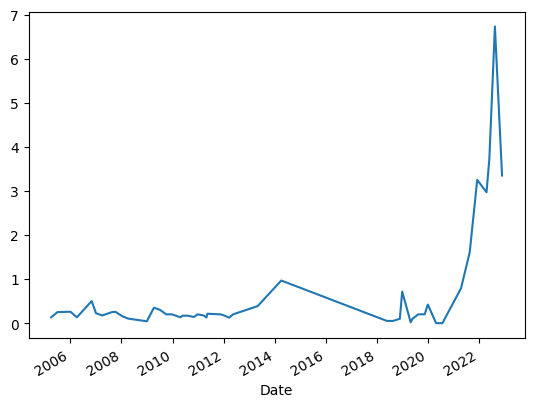

In [32]:
dy_petr4['Dividends'].plot();

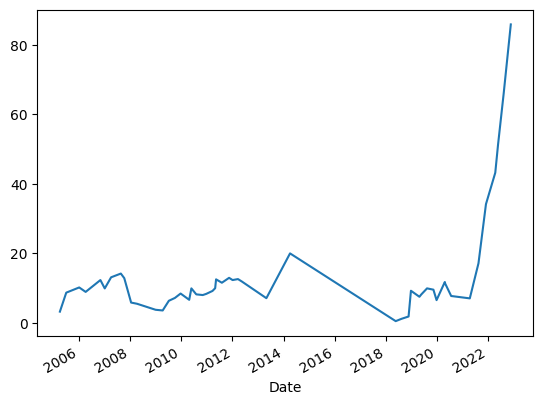

In [34]:
dy_petr4['DY'].plot();

In [35]:
np.mean(dy_petr4.DY)

13.6586358861783

In [36]:
np.median(dy_petr4.DY)

9.351656957528444

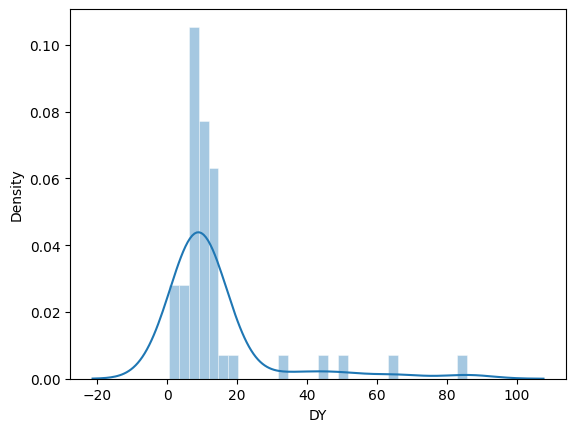

In [58]:
sns.histplot(dy_petr4['DY'], kde=True, stat= 'density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4));

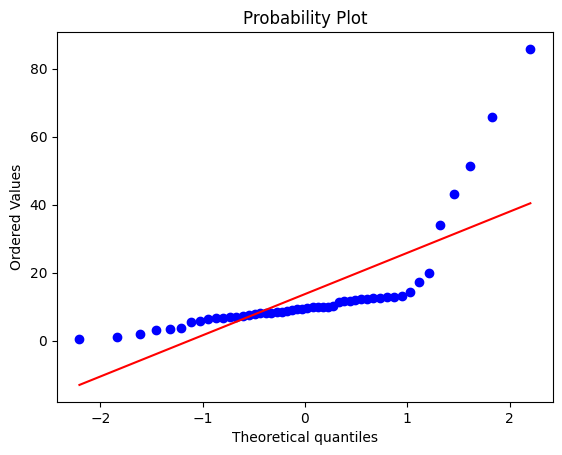

In [59]:
stats.probplot(dy_petr4.DY, dist="norm", plot=pylab)
pylab.show()

In [60]:
fig04 = px.scatter(x=dy_petr4.Close, y=dy_petr4.DY, width=500)

fig04.update_layout(width=500, height=500, template = 'simple_white', 
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False, xaxis_title='<b>Preço PETR4 (R$)', yaxis_title='<b>DY PETR4 (%)')
                    
fig04.show() 

In [61]:
corr, p = stats.pearsonr(dy_petr4.Close, dy_petr4.DY)
print('Correlação de Pearson, r=%.3f' %corr, 'p=%.3f' %p)

Correlação de Pearson, r=0.773 p=0.000


In [62]:
corr, p = stats.spearmanr(dy_petr4.Close, dy_petr4.DY)
print('Correlação de Spearman, r=%.3f' %corr, 'p=%.3f' %p)

Correlação de Spearman, r=-0.002 p=0.989


## 4 - Spread entre PETR4 e PETR3

In [3]:
import pandas as pd

In [4]:
spread = pd.read_csv('spread_petro.csv', index_col = 0)

In [5]:
spread.index = pd.to_datetime(spread.index, utc=True)

In [6]:
spread.head()

,PETR3.SA,PETR4.SA
Date,,
2010-01-04 02:00:00+00:00,17.247704,13.817431
2010-01-05 02:00:00+00:00,17.144175,13.698956
2010-01-06 02:00:00+00:00,17.313967,13.884079
2010-01-07 02:00:00+00:00,17.210434,13.754492
2010-01-08 02:00:00+00:00,17.082066,13.680444


In [7]:
spread['ratio'] = round(spread['PETR4.SA']/spread['PETR3.SA'], 3)

In [8]:
spread.head()

,PETR3.SA,PETR4.SA,ratio
Date,,,
2010-01-04 02:00:00+00:00,17.247704,13.817431,0.801
2010-01-05 02:00:00+00:00,17.144175,13.698956,0.799
2010-01-06 02:00:00+00:00,17.313967,13.884079,0.802
2010-01-07 02:00:00+00:00,17.210434,13.754492,0.799
2010-01-08 02:00:00+00:00,17.082066,13.680444,0.801


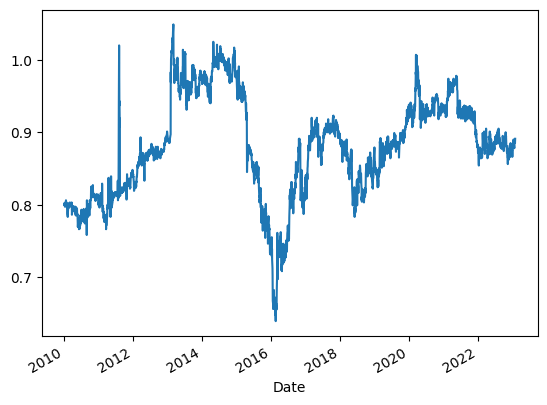

In [9]:
spread['ratio'].plot();

In [14]:
media_spread = round(np.mean(spread.ratio),3)
sd1_min_spread = media_spread - round(np.std(spread.ratio),3)
sd1_max_spread = media_spread + round(np.std(spread.ratio),3)
sd2_min_spread = media_spread - (2* (round(np.std(spread.ratio),3)))
sd2_max_spread = media_spread + (2* (round(np.std(spread.ratio),3)))

In [15]:
fig = px.line(spread, x=spread.index, y=spread.ratio)

fig.add_hline(y=media_spread, line_width=5, line_color="green")
fig.add_hline(y=sd1_min_spread, line_width=3, line_dash="dash", line_color="orange")
fig.add_hline(y=sd1_max_spread, line_width=3, line_dash="dash", line_color="orange")
fig.add_hline(y=sd2_min_spread, line_width=5, line_dash="dash", line_color="red")
fig.add_hline(y=sd2_max_spread, line_width=5, line_dash="dash", line_color="red")

fig.update_layout(xaxis_rangeslider_visible=False, title_text='Razão entre preço PETR4 e PETR3 (2010 e mar/2022)',
                  paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=70, b=20),
                  template = 'simple_white',width=500,height=500)
fig.show()

c:\Users\brubr\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## 5 - Médias Móveis

In [16]:
spread.head()

,PETR3.SA,PETR4.SA,ratio
Date,,,
2010-01-04 02:00:00+00:00,17.247704,13.817431,0.801
2010-01-05 02:00:00+00:00,17.144175,13.698956,0.799
2010-01-06 02:00:00+00:00,17.313967,13.884079,0.802
2010-01-07 02:00:00+00:00,17.210434,13.754492,0.799
2010-01-08 02:00:00+00:00,17.082066,13.680444,0.801


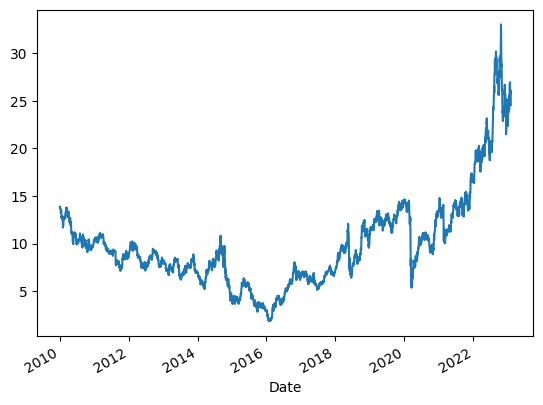

In [17]:
spread['PETR4.SA'].plot();

In [18]:
spread['MM_20'] = spread['PETR4.SA'].rolling(20).mean()

In [19]:
# Precisou de 20 dias para fazer a média

spread.head(20)

,PETR3.SA,PETR4.SA,ratio,MM_20
Date,,,,
2010-01-04 02:00:00+00:00,17.247704,13.817431,0.801,NaN
2010-01-05 02:00:00+00:00,17.144175,13.698956,0.799,NaN
2010-01-06 02:00:00+00:00,17.313967,13.884079,0.802,NaN
2010-01-07 02:00:00+00:00,17.210434,13.754492,0.799,NaN
2010-01-08 02:00:00+00:00,17.082066,13.680444,0.801,NaN
2010-01-11 02:00:00+00:00,17.098629,13.636019,0.797,NaN
2010-01-12 02:00:00+00:00,16.883289,13.462003,0.797,NaN
2010-01-13 02:00:00+00:00,16.730070,13.439786,0.803,NaN
2010-01-14 02:00:00+00:00,16.460896,13.206534,0.802,NaN


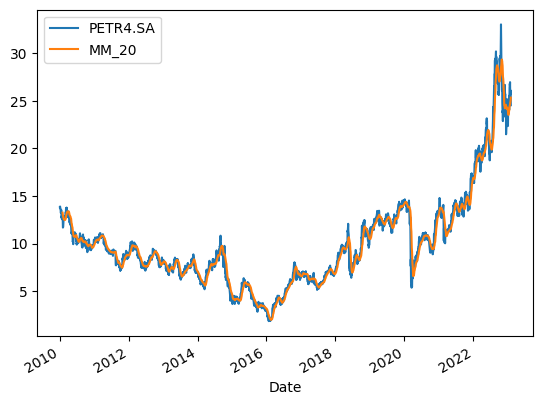

In [20]:
# Plot de PETR4 normal e suavizada
spread[['PETR4.SA', 'MM_20']].plot();

In [21]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=spread.index, y=spread["PETR4.SA"], name = 'Cotação de PETR4'))
fig.add_trace(go.Scatter(x=spread.index, y=spread["MM_20"], name = 'Média Móvel de 20 períodos'))

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), 
                  template = 'simple_white',
                  paper_bgcolor="#f7f8fa", width=800,height=400)

fig.show()

In [22]:
spread['MM_100'] = spread['PETR4.SA'].rolling(100).mean()

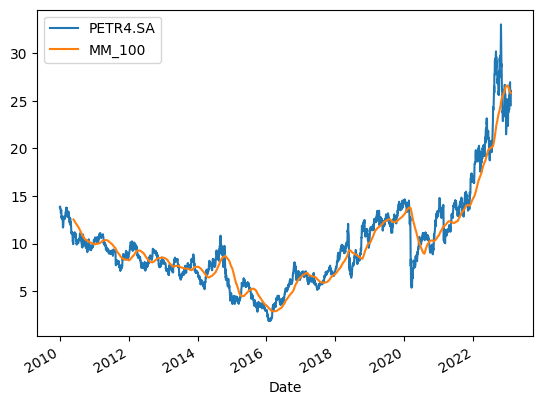

In [23]:
# Super suavizada
spread[['PETR4.SA', 'MM_100']].plot();

* Z-score
- Usa 1,96 pois este implica nos 95% de confiança da tabela Z-score


In [24]:
spread['IC_95_mm_lower'] = spread['PETR4.SA'].rolling(window=20).mean() - 1.96*spread['PETR4.SA'].rolling(window=20).std()
spread['IC_95_mm_upper'] = spread['PETR4.SA'].rolling(window=20).mean() + 1.96*spread['PETR4.SA'].rolling(window=20).std()

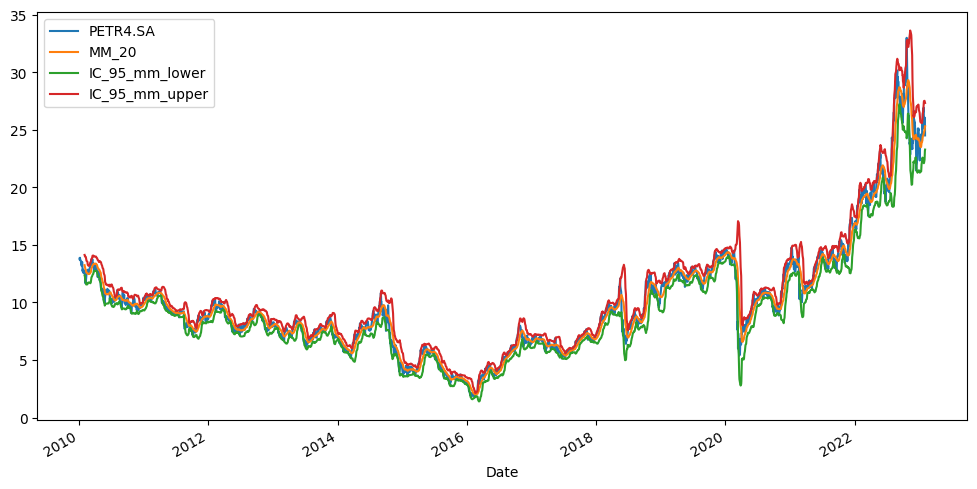

In [26]:
spread[['PETR4.SA','MM_20','IC_95_mm_lower','IC_95_mm_upper']].plot(figsize= (12,6));

In [27]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=spread.index, y=spread["PETR4.SA"], name = 'Cotação de PETR4'))
fig.add_trace(go.Scatter(x=spread.index, y=spread["MM_20"], name = 'Média Móvel de 20 períodos'))
fig.add_trace(go.Scatter(x=spread.index, y=spread["IC_95_mm_lower"], name = 'Banda Inferior'))
fig.add_trace(go.Scatter(x=spread.index, y=spread["IC_95_mm_upper"], name = 'Banda Superior'))

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), 
                  template = 'simple_white',
                  paper_bgcolor="#f7f8fa", width=800,height=400)

fig.show()

## 6 - Dados BCB

* Endereço padrão: __"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={dataInicial}&dataFinal={dataFinal}"__

- Ex 1: IPCA (433)

In [73]:
url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json&dataInicial=01/01/2020&dataFinal=01/11/2023'

In [74]:
import pandas as pd

In [75]:
df = pd.read_json(url)

In [76]:
df.set_index('data', inplace = True)

In [77]:
df.head()

,valor
data,
01/01/2020,0.21
01/02/2020,0.25
01/03/2020,0.07
01/04/2020,-0.31
01/05/2020,-0.38


In [78]:
df.index = pd.to_datetime(df.index, dayfirst= True)

In [79]:
df.head()

,valor
data,
2020-01-01,0.21
2020-02-01,0.25
2020-03-01,0.07
2020-04-01,-0.31
2020-05-01,-0.38


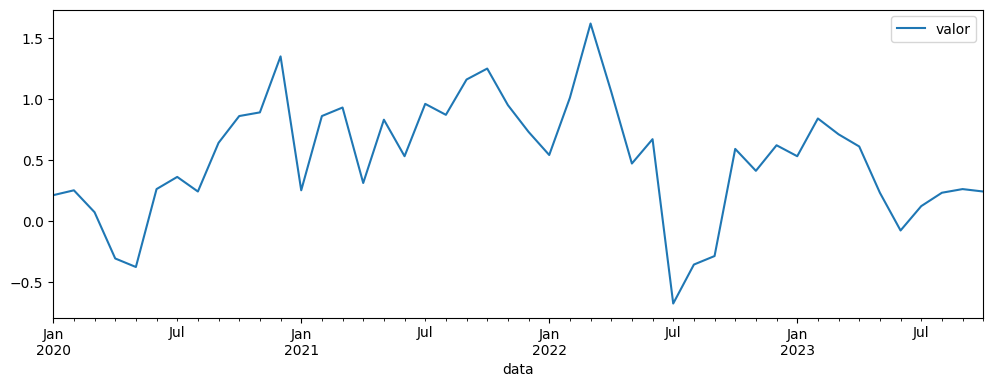

In [82]:
df.plot(figsize=(12,4));

* !!! Generalizando e criando função

In [85]:
def extracao_bcb(codigo, inicio, fim):
    url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}".format(codigo, inicio, fim)
    df = pd.read_json(url)
    df.set_index('data', inplace = True)
    df.index = pd.to_datetime(df.index, dayfirst= True)
    return df

In [91]:
selic = extracao_bcb(432, '01/01/2000', '01/01/2024')

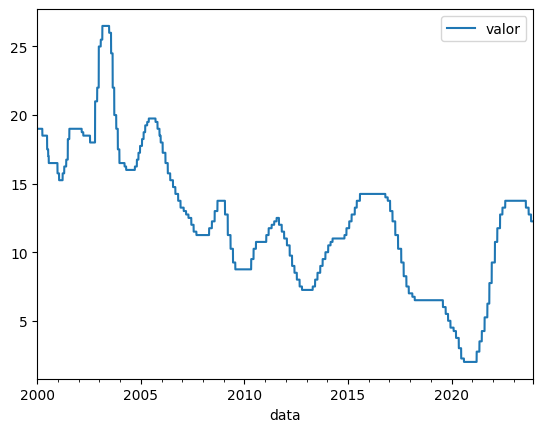

In [93]:
selic.plot();

In [111]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=selic.index, y=selic['valor'], name = 'Taxa Selic - Copom'))

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20),
                  template = 'simple_white',
                  paper_bgcolor="#f7f8fa", width=800,height=400)

fig.show()

## 7 - Relatório Sweetviz

In [1]:
import sweetviz as sv
import pandas as pd
import yfinance as yf

In [2]:
ticker_IBOV = ['VALE3', 'PETR4', 'WEGE3', 'ITUB4', 'MGLU3',
               'BBDC4', 'ABEV3', 'BBAS3', 'ELET3', 'RENT3',
               'ITSA4', 'JBSS3', 'SUZB3', 'LREN3', 'EQTL3']

In [3]:
ticker_IBOV = [i + '.SA' for i in ticker_IBOV]

In [6]:
ticker_IBOV.extend(['^BVSP', 'BRL=x'])

In [14]:
dados_close = yf.download(ticker_IBOV, '2015-01-01', '2023-10-11')['Adj Close']

[*********************100%%**********************]  17 of 17 completed


In [15]:
dados_close.describe()

,ABEV3.SA,BBAS3.SA,BBDC4.SA,BRL=X,ELET3.SA,EQTL3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LREN3.SA,MGLU3.SA,PETR4.SA,RENT3.SA,SUZB3.SA,VALE3.SA,WEGE3.SA,^BVSP
count,2183.000000,2183.000000,2183.000000,2286.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2175.000000
mean,14.780670,26.329374,15.114919,4.238611,23.659409,16.275274,6.742987,22.403558,15.770748,26.453361,6.386925,9.974376,33.570390,35.334373,40.620894,18.068560,87277.808276
std,1.672914,9.645887,4.298780,0.901747,12.881912,7.739142,1.960452,5.814040,8.126156,10.260444,7.338319,6.805533,20.638665,15.003586,25.310737,13.265372,25191.794307
min,9.777991,8.307048,5.715342,2.569300,3.729387,4.122305,2.808657,9.911385,4.696399,9.799355,0.029192,1.489210,5.521730,16.233162,5.419992,4.369716,37497.000000
25%,13.945230,19.497979,12.215292,3.335875,13.021248,9.679178,4.940773,18.755093,8.226216,17.921602,0.685426,5.036720,11.632765,18.384819,18.396640,6.210875,63952.500000
50%,14.707459,25.827250,15.279404,4.001400,26.002495,15.211109,7.369545,23.286604,15.526731,24.875124,3.660000,8.626395,30.602871,36.638779,34.693138,9.097594,94406.000000
75%,15.591651,33.537865,18.261448,5.167900,33.982536,23.068017,8.289777,27.150240,21.257039,34.689863,8.752719,11.398121,53.952196,47.305813,65.663250,32.527485,109381.000000
max,20.366480,50.898174,24.045462,5.886400,51.236275,34.459999,10.224908,33.115936,34.553322,55.053009,27.401571,35.209999,71.659164,74.654106,93.085793,44.154270,130776.000000


In [16]:
# Criando relatório com Sweetviz

visual = sv.analyze(dados_close)

                                             |          | [  0%]   00:00 -> (? left)

In [17]:
visual.show_html('RelatorioMF.html')

Report RelatorioMF.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
